In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')

# Display the first few rows
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Display feature names and their data types
print("Feature names and types:\n")
print(iris.dtypes)

# Separate feature types
numeric_features = iris.select_dtypes(include=['float64']).columns.tolist()
categorical_features = iris.select_dtypes(include=['object']).columns.tolist()

print("\nNumeric Features:", numeric_features)
print("Categorical (Nominal) Features:", categorical_features)


Feature names and types:

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Numeric Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Categorical (Nominal) Features: ['species']


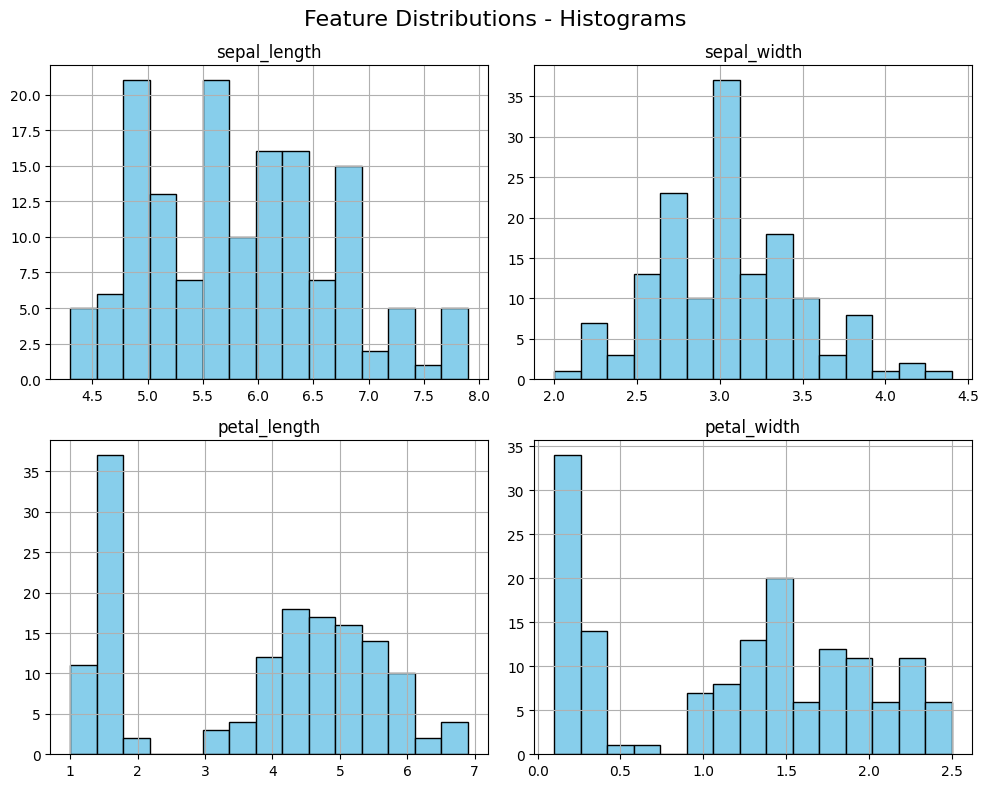

In [4]:
# Plot histograms for numeric features
iris[numeric_features].hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions - Histograms', fontsize=16)
plt.tight_layout()
plt.show()


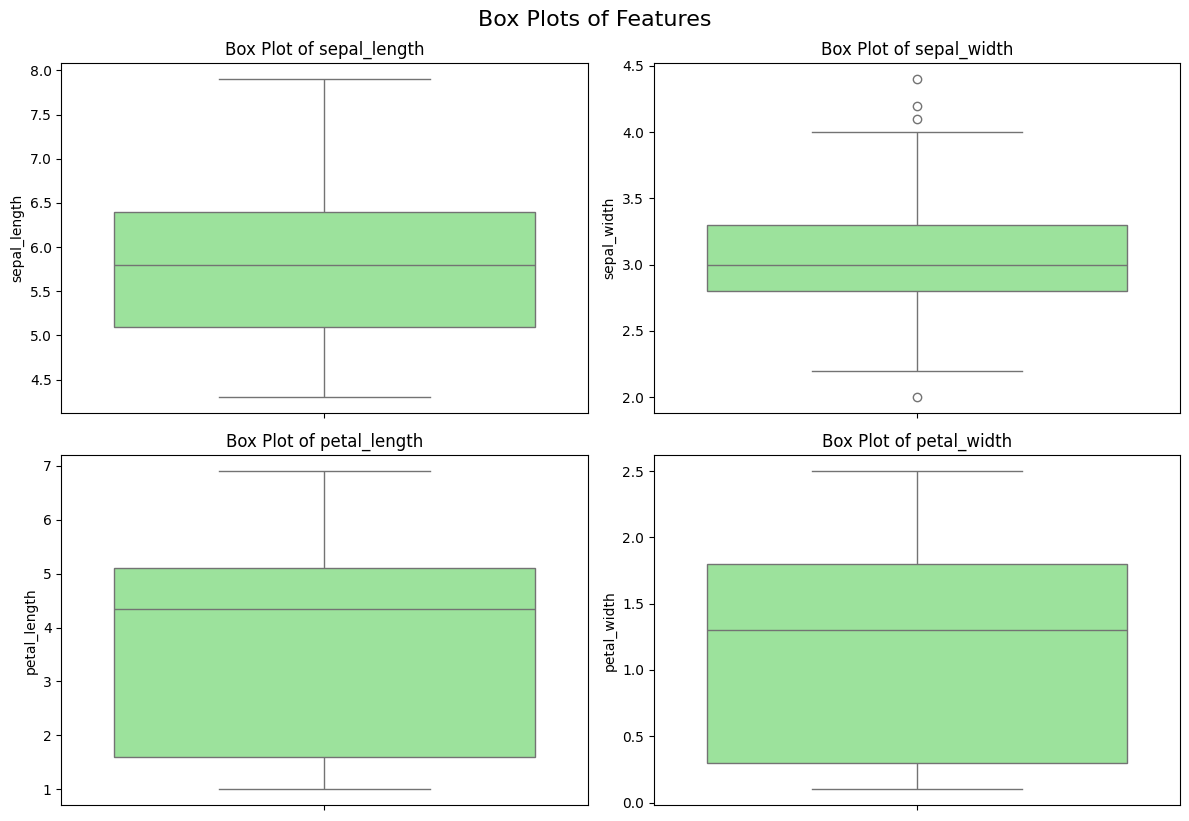

In [5]:
# Set up a grid of box plots
plt.figure(figsize=(12, 8))

# Loop through numeric features and plot boxplots
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=iris[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.suptitle('Box Plots of Features', fontsize=16, y=1.02)
plt.show()


In [6]:
print("Outlier Observations:")

# Check for outliers using IQR method
for col in numeric_features:
    Q1 = iris[col].quantile(0.25)
    Q3 = iris[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = iris[(iris[col] < Q1 - 1.5 * IQR) | (iris[col] > Q3 + 1.5 * IQR)]
    
    print(f"\n{col}:")
    if not outliers.empty:
        print(f"  ➤ Outliers detected: {len(outliers)}")
    else:
        print("  ➤ No significant outliers")


Outlier Observations:

sepal_length:
  ➤ No significant outliers

sepal_width:
  ➤ Outliers detected: 4

petal_length:
  ➤ No significant outliers

petal_width:
  ➤ No significant outliers
